In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import scipy
import investpy
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Import data

In [31]:
ft = yf.download("CC=F KC=F SB=F ZL=F GF=F LE=F HE=F ZM=F ZR=F",start="2010-01-02",end="2020-08-31")
ft.fillna(method='bfill', inplace=True)
ft = ft.dropna()
ft = ft['Adj Close']
ft.head()

[*********************100%***********************]  9 of 9 completed


,CC=F,GF=F,HE=F,KC=F,LE=F,SB=F,ZL=F,ZM=F,ZR=F
Date,,,,,,,,,
2010-01-04,3256.0,95.875000,65.849998,141.850006,85.375000,27.620001,40.900002,316.000000,1481.0
2010-01-05,3321.0,96.550003,67.599998,141.000000,86.324997,27.639999,40.709999,319.399994,1477.0
2010-01-06,3292.0,96.300003,66.574997,141.600006,85.949997,28.410000,40.669998,317.899994,1478.0
2010-01-07,3309.0,96.449997,67.099998,141.899994,85.925003,28.000000,39.990002,307.000000,1471.5
2010-01-08,3296.0,96.349998,67.250000,145.350006,85.824997,27.530001,39.529999,306.799988,1470.5


In [32]:
st = yf.download("PTTEP.BK TVO.BK CPF.BK BTS.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st.fillna(method='bfill', inplace=True)
st = st.dropna()
st = st['Adj Close']
st.head()

[*********************100%***********************]  5 of 5 completed


,BTS.BK,CPF.BK,PTTEP.BK,TNPC.BK,TVO.BK
Date,,,,,
2010-01-04,2.294183,7.740198,91.686096,0.380774,9.123015
2010-01-05,2.294183,7.603206,92.628090,0.380774,9.123015
2010-01-06,2.255942,7.740198,93.570053,0.380774,9.173982
2010-01-07,2.255942,7.740198,92.628090,0.380774,9.224945
2010-01-08,2.255942,8.014190,93.256287,0.380774,9.275917


In [33]:
PTT = ft.join(st['CPF.BK'])
PTT = PTT.dropna()
PTT

,CC=F,GF=F,HE=F,KC=F,LE=F,SB=F,ZL=F,ZM=F,ZR=F,CPF.BK
Date,,,,,,,,,,
2010-01-04,3256.0,95.875000,65.849998,141.850006,85.375000,27.620001,40.900002,316.000000,1481.00,7.740198
2010-01-05,3321.0,96.550003,67.599998,141.000000,86.324997,27.639999,40.709999,319.399994,1477.00,7.603206
2010-01-06,3292.0,96.300003,66.574997,141.600006,85.949997,28.410000,40.669998,317.899994,1478.00,7.740198
2010-01-07,3309.0,96.449997,67.099998,141.899994,85.925003,28.000000,39.990002,307.000000,1471.50,7.740198
2010-01-08,3296.0,96.349998,67.250000,145.350006,85.824997,27.530001,39.529999,306.799988,1470.50,8.014190
...,...,...,...,...,...,...,...,...,...,...
2020-08-24,2509.0,142.000000,54.599998,120.250000,105.574997,12.710000,31.660000,289.100006,1226.00,33.349998
2020-08-25,2537.0,142.250000,55.950001,123.199997,105.500000,12.760000,31.980000,291.600006,1202.00,33.102962
2020-08-26,2488.0,142.475006,55.549999,122.800003,104.050003,12.580000,32.240002,291.500000,12.31,33.349998


In [34]:
# df = pd.read_csv('BZ=F.csv')
# df = df.rename(columns={'วันเดือนปี' : 'Date','ล่าสุด' : 'BZ=F'})
# df = df[['BZ=F']]

# PTT = PTT.merge(df)
# PTT

# Visualize the Time Series

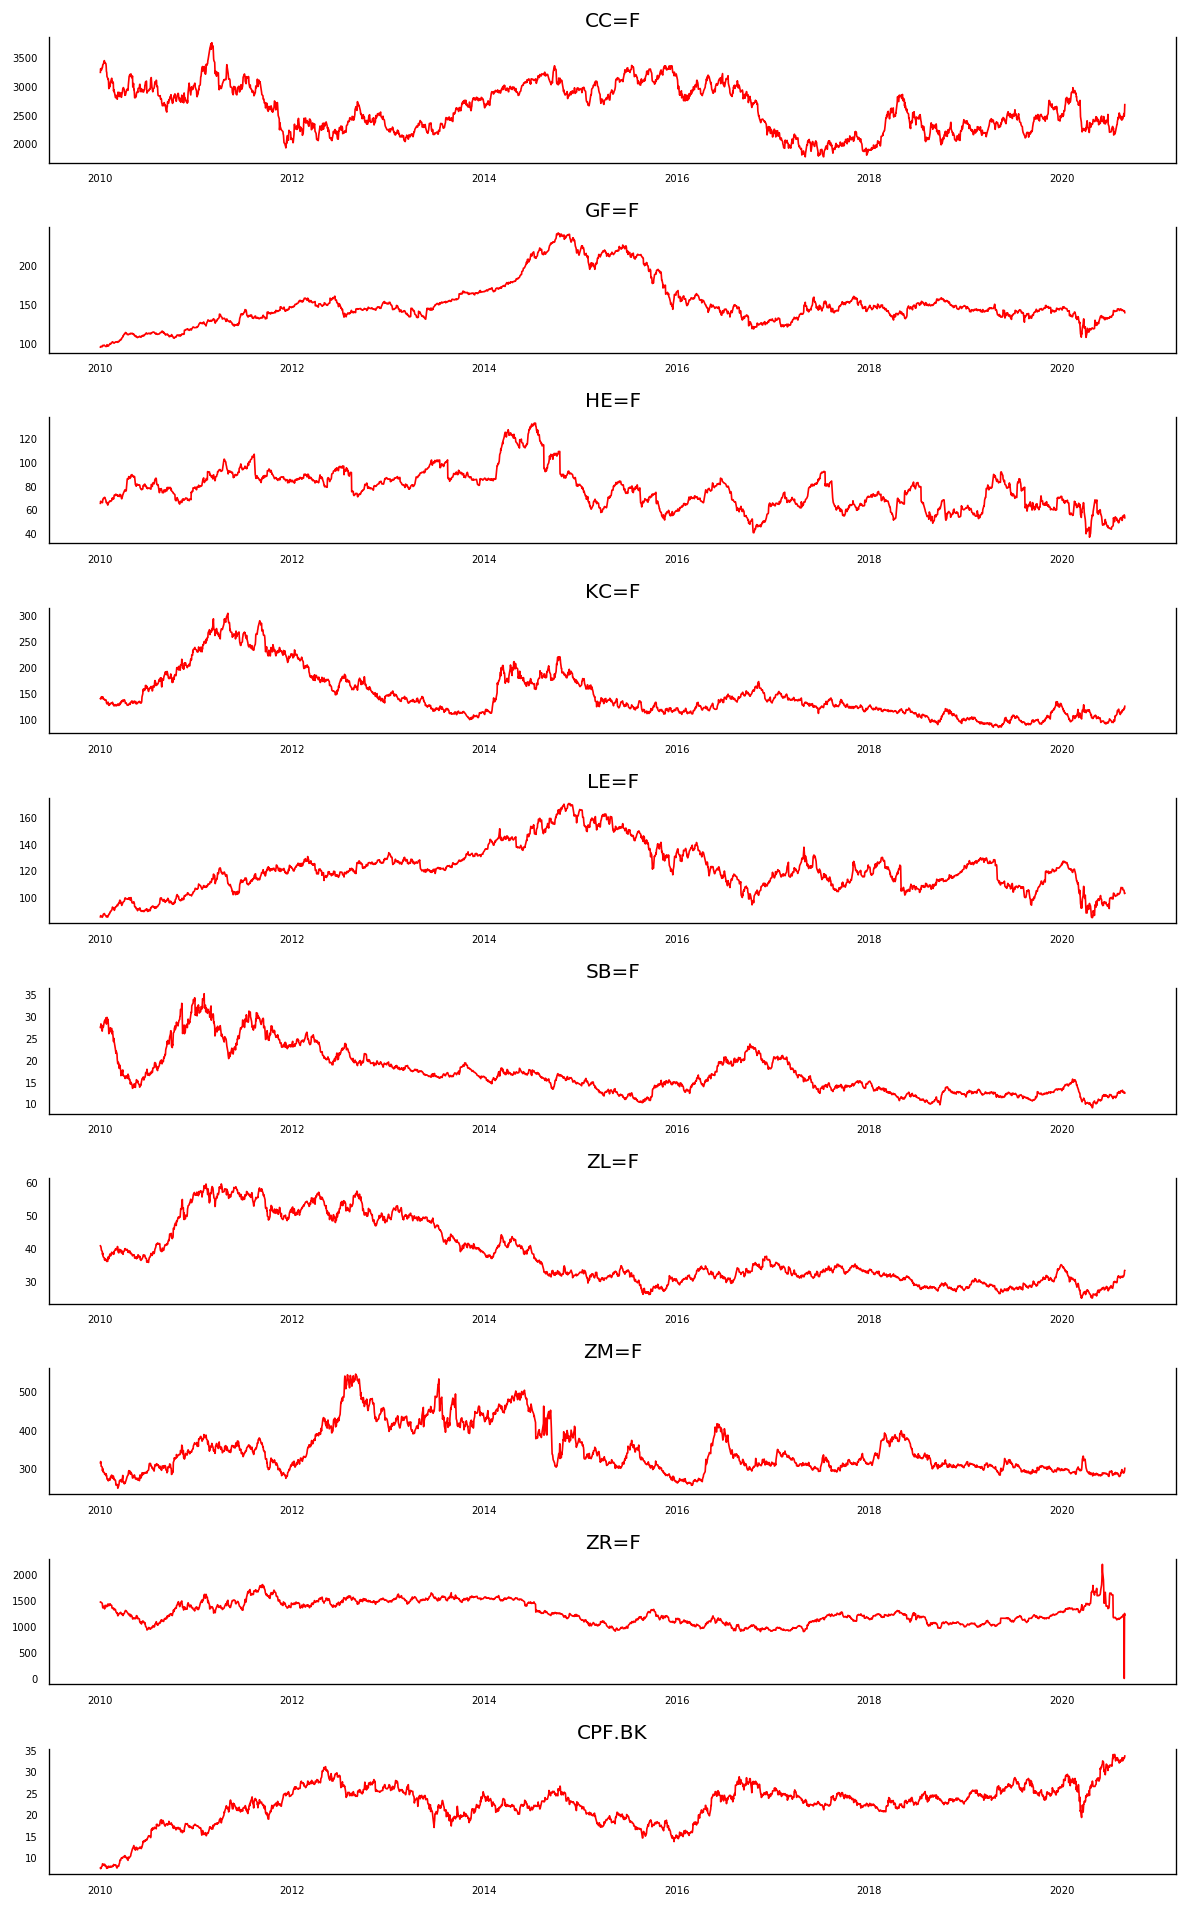

In [35]:
fig, axes = plt.subplots(nrows=len(PTT.columns), ncols=1, dpi=120, figsize=(10,16))
for i, ax in enumerate(axes.flatten()):
    data = PTT[PTT.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(PTT.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Correlation

In [36]:
PTT.corr().loc[['CPF.BK']]

,CC=F,GF=F,HE=F,KC=F,LE=F,SB=F,ZL=F,ZM=F,ZR=F,CPF.BK
CPF.BK,-0.519013,0.065061,-0.098508,-0.120322,0.044269,-0.202603,-0.04794,0.181942,0.074154,1.0


# Testing Causation using Granger’s Causality Test

In [37]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=24
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    PTT = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in PTT.columns:
        for r in PTT.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            PTT.loc[r, c] = min_p_value
    PTT.columns = [var + '_x' for var in variables]
    PTT.index = [var + '_y' for var in variables]
    return PTT

grangers_causation_matrix(PTT, variables = PTT.columns).loc[['CPF.BK_y']] 

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, bu

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,CC=F_x,GF=F_x,HE=F_x,KC=F_x,LE=F_x,SB=F_x,ZL=F_x,ZM=F_x,ZR=F_x,CPF.BK_x
CPF.BK_y,0.372,0.0426,0.2633,0.089,0.0877,0.0593,0.2554,0.0506,0.2396,1.0


# Cointegration Test

In [38]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(PTT, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(PTT,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(PTT.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(PTT)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CC=F   ::  230.5     > 219.4051  =>   True
GF=F   ::  180.16    > 179.5199  =>   True
HE=F   ::  137.42    > 143.6691  =>   False
KC=F   ::  104.93    > 111.7797  =>   False
LE=F   ::  75.97     > 83.9383   =>   False
SB=F   ::  49.09     > 60.0627   =>   False
ZL=F   ::  29.49     > 40.1749   =>   False
ZM=F   ::  13.45     > 24.2761   =>   False
ZR=F   ::  4.09      > 12.3212   =>   False
CPF.BK ::  0.01      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [39]:
nobs = 7
ft_train, ft_test = PTT[0:-nobs], PTT[-nobs:]

# Check size
print(ft_train.shape)  
print(ft_test.shape)  
ft_train

(2490, 10)
(7, 10)


,CC=F,GF=F,HE=F,KC=F,LE=F,SB=F,ZL=F,ZM=F,ZR=F,CPF.BK
Date,,,,,,,,,,
2010-01-04,3256.0,95.875000,65.849998,141.850006,85.375000,27.620001,40.900002,316.000000,1481.0,7.740198
2010-01-05,3321.0,96.550003,67.599998,141.000000,86.324997,27.639999,40.709999,319.399994,1477.0,7.603206
2010-01-06,3292.0,96.300003,66.574997,141.600006,85.949997,28.410000,40.669998,317.899994,1478.0,7.740198
2010-01-07,3309.0,96.449997,67.099998,141.899994,85.925003,28.000000,39.990002,307.000000,1471.5,7.740198
2010-01-08,3296.0,96.349998,67.250000,145.350006,85.824997,27.530001,39.529999,306.799988,1470.5,8.014190
...,...,...,...,...,...,...,...,...,...,...
2020-08-13,2487.0,144.949997,53.700001,116.199997,107.050003,13.110000,31.600000,290.100006,1175.5,32.855927
2020-08-14,2436.0,143.925003,53.825001,114.699997,107.599998,13.100000,31.530001,289.700012,1189.0,32.608891
2020-08-17,2421.0,142.725006,53.525002,115.550003,106.900002,13.060000,31.299999,298.299988,1197.5,32.855927


# Check for Stationarity and Make the Time Series Stationary

In [40]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [41]:
# ADF Test on each column
for name, column in ft_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CC=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.941
 No. Lags Chosen       = 0
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0408. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GF=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0638
 No. Lags Chosen       = 1
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.2593. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HE=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

In [42]:
# 1st difference
ft_differenced = ft_train.diff().dropna()

In [43]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in ft_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CC=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -33.8386
 No. Lags Chosen       = 1
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GF=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -46.0372
 No. Lags Chosen       = 0
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HE=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.0

In [44]:
# # Second Differencing
# ft_differenced = ft_differenced.diff().dropna()

In [45]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in ft_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

# Select the Order (P) of VAR model

In [46]:
model = VAR(ft_differenced)
for i in list(range(1,24)):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 1
AIC :  17.921055689086394
BIC :  18.17833695513322
FPE :  60675846.76596422
HQIC:  18.01448376940979 

Lag Order = 2
AIC :  17.956100618670767
BIC :  18.44743749571086
FPE :  62840142.09011463
HQIC:  18.134526352732088 

Lag Order = 3
AIC :  17.999476904802748
BIC :  18.72502532971904
FPE :  65626480.117402196
HQIC:  18.262960395229257 

Lag Order = 4
AIC :  18.049228611883365
BIC :  19.00914469027274
FPE :  68975267.67384295
HQIC:  18.397830028223 

Lag Order = 5
AIC :  18.081640219439088
BIC :  19.27608022586309
FPE :  71249469.57564883
HQIC:  18.515419798261743 

Lag Order = 6
AIC :  18.110144590708256
BIC :  19.539264968944252
FPE :  73312631.24317765
HQIC:  18.62916263570724 

Lag Order = 7
AIC :  18.14539778731459
BIC :  19.80935515060743
FPE :  75947579.68289898
HQIC:  18.749714669408302 

Lag Order = 8
AIC :  18.17883755606834
BIC :  20.077788687382473
FPE :  78536159.098814
HQIC:  18.86851371350214 

Lag Order = 9
AIC :  18.20524659112945
BIC :  20.33934844340151

In [47]:
#Lag Order = 3
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,17.93,17.95*,6.107e+07,17.94*
1,17.93*,18.18,6.104e+07*,18.02
2,17.96,18.45,6.310e+07,18.14
3,18.00,18.73,6.576e+07,18.27
4,18.05,19.01,6.898e+07,18.40


# Train the VAR Model of Selected Order(p)

In [48]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 19, Nov, 2020
Time:                     23:36:26
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    18.1783
Nobs:                     2488.00    HQIC:                   18.0145
Log likelihood:          -57487.0    FPE:                6.06758e+07
AIC:                      17.9211    Det(Omega_mle):     5.80573e+07
--------------------------------------------------------------------
Results for equation CC=F
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.285408         0.900538           -0.317           0.751
L1.CC=F           0.004651         0.020345            0.229           0.819
L1.GF=F          -0.038156         0.627573           -0.061           0.952


# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [49]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(PTT.columns, out):
    print( col,':', round(val, 2))

CC=F : 2.0
GF=F : 2.0
HE=F : 2.0
KC=F : 2.0
LE=F : 2.0
SB=F : 2.0
ZL=F : 2.0
ZM=F : 2.0
ZR=F : 1.99
CPF.BK : 2.0


# Forecast VAR model using statsmodels

In [50]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]
forecast_input

1


array([[-30.        ,   0.32499695,   1.125     ,  -0.8500061 ,
          0.75      ,   0.34999943,   0.09000015,  -0.5       ,
         12.        ,  -0.49407196]])

In [51]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast = pd.DataFrame(fc, index=PTT.index[-nobs:], columns=PTT.columns + '_1d')
ft_forecast


,CC=F_1d,GF=F_1d,HE=F_1d,KC=F_1d,LE=F_1d,SB=F_1d,ZL=F_1d,ZM=F_1d,ZR=F_1d,CPF.BK_1d
Date,,,,,,,,,,
2020-08-20,3.637762,0.074891,0.147717,0.287334,0.043304,-0.007104,0.026328,0.048526,0.558145,0.058352
2020-08-21,-0.472890,0.023496,-0.008366,-0.016616,0.012034,-0.007523,-0.003671,-0.033358,0.011301,0.009255
2020-08-24,-0.353513,0.018651,-0.006926,-0.008689,0.008375,-0.005755,-0.003692,-0.011961,-0.101503,0.010214
2020-08-25,-0.350571,0.018787,-0.006190,-0.008941,0.008426,-0.005784,-0.003601,-0.009439,-0.107490,0.010157
2020-08-26,-0.350586,0.018839,-0.006103,-0.008909,0.008462,-0.005784,-0.003613,-0.009494,-0.108593,0.010167
2020-08-27,-0.350635,0.018844,-0.006097,-0.008911,0.008468,-0.005785,-0.003613,-0.009481,-0.108727,0.010166
2020-08-28,-0.350634,0.018845,-0.006096,-0.008910,0.008468,-0.005785,-0.003613,-0.009481,-0.108749,0.010166


# Invert the transformation to get the real forecast

In [52]:
def invert_transformation(ft_train, ft_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    ft_fc = ft_forecast.copy()
    columns = ft_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            ft_fc[str(col)+'_1d'] = (ft_train[col].iloc[-1]-ft_train[col].iloc[-2]) + ft_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        ft_fc[str(col)+'_forecast'] = ft_train[col].iloc[-1] + ft_fc[str(col)+'_1d'].cumsum()
    return ft_fc

In [53]:
ft_results = invert_transformation(ft_train, ft_forecast, second_diff=False)        
ft_results.loc[:, ["CPF.BK_forecast" ]]

,CPF.BK_forecast
Date,
2020-08-20,32.914278
2020-08-21,32.923533
2020-08-24,32.933747
2020-08-25,32.943904
2020-08-26,32.954071
2020-08-27,32.964237
2020-08-28,32.974404


# Evaluate the Forecasts & Plot of Forecast vs Actuals 

Forecast Accuracy of: CPF
mae (Mean Absolute Error) :  0.3579
rmse (Root Mean Square Error) :  0.4146
mape (Mean absolute percentage error) :  1.0733


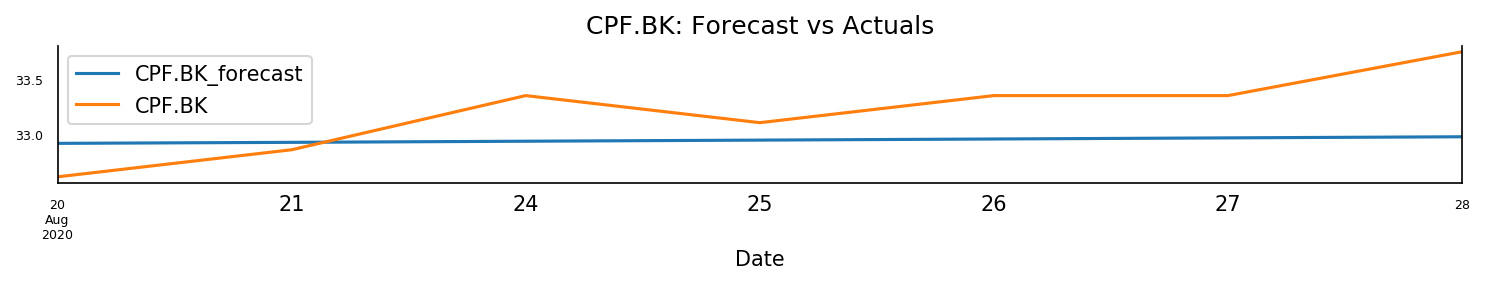

In [54]:


fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,2))
ft_results['CPF.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
ft_test['CPF.BK'].plot(legend=True );
axes.set_title('CPF.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
#  
#     n = train.shape[0]
#     d = np.abs(  np.diff( train) ).sum()/(n-1)
    
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     mase = np.mean(np.abs(actual - forecast ))/d
    
#     me = np.mean(forecast - actual)             # ME
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mae (Mean Absolute Error)': mae, 
            'rmse (Root Mean Square Error)':rmse,
            'mape (Mean absolute percentage error)':mape*100})

print('Forecast Accuracy of: CPF')
accuracy_prod = forecast_accuracy(ft_results['CPF.BK_forecast'].values, ft_test['CPF.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
plt.tight_layout();



#  Plot of Forecast vs Actuals ( Forecast 1 year )

In [56]:
start = 0
end = 2340
nobs = 7
max_row = len(PTT) - end

forecast_results = pd.DataFrame()
forecast_test = PTT[end:]


while max_row > 0 :
    if(max_row < nobs):
        ft_train, ft_test = PTT[start:end] , PTT[end:end+max_row]
    else :
        ft_train, ft_test = PTT[start:end] , PTT[end:end+nobs]

    ft_differenced = ft_train.diff().dropna()

    model = VAR(ft_differenced)

    model_fitted = model.fit(2)
    model_fitted.summary()

    lag_order = model_fitted.k_ar

    # Input data for forecasting
    forecast_input = ft_differenced.values[-lag_order:]


    # Forecast
    if(max_row < nobs):
        fc = model_fitted.forecast(y=forecast_input, steps=max_row)
        ft_forecast = pd.DataFrame(fc, index=PTT.index[end:end+max_row], columns=PTT.columns + '_1d')
    else:
        fc = model_fitted.forecast(y=forecast_input, steps=nobs)
        ft_forecast = pd.DataFrame(fc, index=PTT.index[end:end+nobs], columns=PTT.columns + '_1d')


    ft_results = invert_transformation(ft_train, ft_forecast, second_diff=False)        
    ft_results.loc[:, ["CPF.BK_forecast" ]]
    
    forecast_results = forecast_results.append(ft_results)  
    
    if(max_row < nobs):
        start += max_row
        end += max_row
        max_row -= max_row
        break    
    
    start += nobs
    end += nobs
    max_row -= nobs
    



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-pa

In [57]:
month = 8
day = 28
New_forecast = pd.DataFrame()
for i in range(0,7):
    day += 1
    if(day > 31):
        month +=1
        day=1
    date = '2020'+'-'+str(month)+'-'+str(day)
    new_date = pd.DataFrame(index = [date])
    New_forecast = New_forecast.append(new_date)
    
ft_train = PTT[start:end] 

ft_differenced = ft_train.diff().dropna()

model = VAR(ft_differenced)

model_fitted = model.fit(2)
model_fitted.summary()

lag_order = model_fitted.k_ar

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]


# Forecast
# if(max_row < nobs):
#     fc = model_fitted.forecast(y=forecast_input, steps=max_row)
#     ft_forecast = pd.DataFrame(fc, index=PTT.index[end:end+max_row], columns=PTT.columns + '_1d')
# else:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast_n = pd.DataFrame(fc, index=New_forecast.index[0:7], columns=PTT.columns + '_1d')


ft_results_n = invert_transformation(ft_train, ft_forecast_n, second_diff=False)        
ft_results_n.loc[:, ["CPF.BK_forecast" ]]

forecast_results_n = ft_results_n
forecast_results_n.index.names = ['Date']

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [58]:
forecast_results.loc[:, ["CPF.BK_forecast" ]]

,CPF.BK_forecast
Date,
2020-01-02,26.425160
2020-01-03,26.437705
2020-01-06,26.446933
2020-01-07,26.453157
2020-01-08,26.461166
...,...
2020-08-24,32.650112
2020-08-25,32.656121
2020-08-26,33.155334


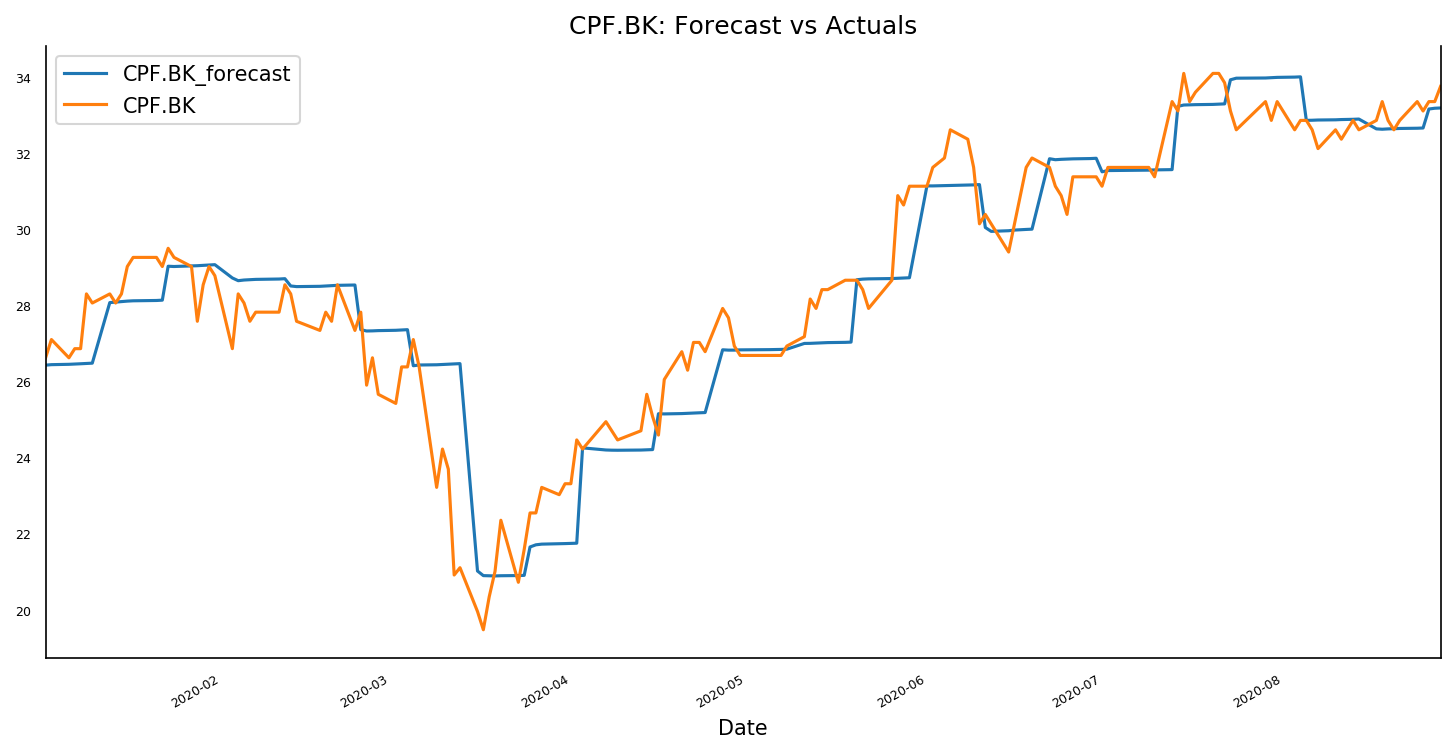

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(12,6))
forecast_results['CPF.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
forecast_test['CPF.BK'].plot(legend=True );
axes.set_title('CPF.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

In [60]:
forecast_results_n.loc[:, ["CPF.BK_forecast" ]]

,CPF.BK_forecast
Date,
2020-8-29,34.080133
2020-8-30,34.022830
2020-8-31,33.968448
2020-9-1,34.004770
2020-9-2,34.008445
2020-9-3,34.010745
2020-9-4,34.019819


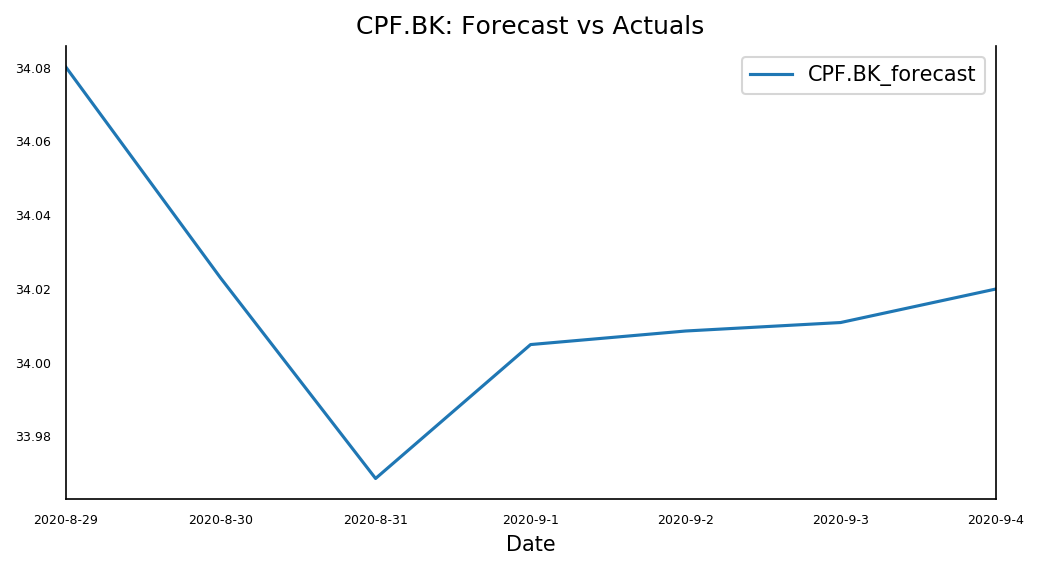

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(8,4))
forecast_results_n['CPF.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
axes.set_title('CPF.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

# Evaluate the Forecasts

In [62]:
print('Forecast Accuracy of: CPF\n')
accuracy_prod = forecast_accuracy(forecast_results['CPF.BK_forecast'].values, forecast_test['CPF.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
plt.tight_layout();

Forecast Accuracy of: CPF

mae (Mean Absolute Error) :  0.8574
rmse (Root Mean Square Error) :  1.1937
mape (Mean absolute percentage error) :  3.1886


<Figure size 432x288 with 0 Axes>